In [5]:
import matplotlib.pyplot as plt
from numpy.random import rand
import numpy as np
from matplotlib.widgets  import RectangleSelector

Looks like this works for drawing rectangles. Need to write something to capture the points..

Possibly useful: https://stackoverflow.com/questions/44274938/rectangle-to-select-area-in-plot-and-find-maximum-value

In [6]:
#%matplotlib notebook

# Works with tkagg 
%matplotlib widget

Dowgrading (mamba install ipywidgets==7.7.5) did not work 


In [17]:
plt.close('all')
xdata = np.linspace(0,9*np.pi, num=301)
ydata = np.sin(xdata)*np.cos(xdata*2.4)
sel = oyv_sel(xdata, ydata)

NameError: name 'oyv_sel' is not defined

Output()

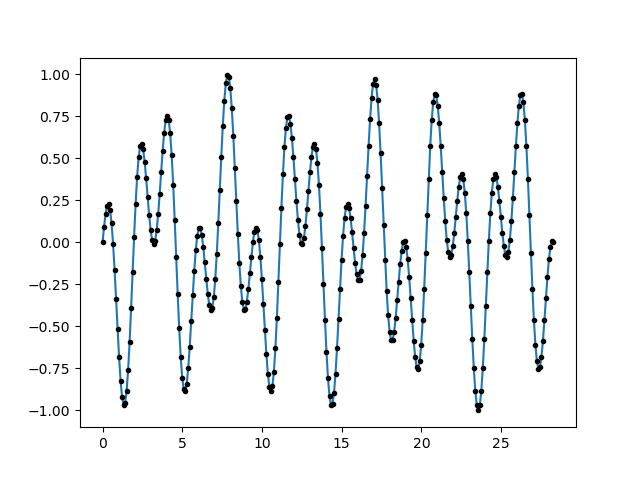

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import ipywidgets as widgets
from IPython.display import display, clear_output

class hand_remove_points:
    def __init__(self, xdata, ydata):
        self.first = True
        self.fig, self.ax = plt.subplots()
        self.fig.canvas.header_visible = False  # Hide the figure header

        self.xdata, self.ydata = xdata.copy(), ydata.copy()
        self.xdata_return, self.ydata_return = xdata.copy(), ydata.copy()

        line, = self.ax.plot(xdata, ydata)
        point = self.ax.plot(xdata, ydata, '.k', zorder=3)
        text = self.ax.text(0, 0, "")
        xpicks = np.array([])

        self.es = RectangleSelector(self.ax, self.onselect, interactive=True)

        self.xcoords_remove = np.array([])
        self.ycoords_remove = np.array([])
        self.xcoords_selected = np.array([])
        self.ycoords_selected = np.array([])

        self.temp_label = 'Points to remove'
        self.remove_label = 'Selected points to remove'


        # Add widgets
        self.button_remove = widgets.Button(description="Remove selected")
        self.button_remove.on_click(self.remove_selected)

        self.button_forget = widgets.Button(description="Forget selection")
        self.button_forget.on_click(self.forget_selection)

        self.button_apply = widgets.Button(description="Exit and apply to data")
        self.button_apply.on_click(self.exit_and_apply)

        self.buttons_container = widgets.HBox([self.button_remove, self.button_forget, self.button_apply])
        
        display(self.buttons_container)
    
        # Add an Output widget to capture the print statement
        self.output_widget = widgets.Output()
        display(self.output_widget)

    
    def onselect(self, eclick, erelease):
        ext = self.es.extents
        rectangle = plt.Rectangle((ext[0], ext[2]), ext[1] - ext[0], ext[3] - ext[2])

        self.contains_TF_ = rectangle.contains_points(np.vstack([self.xdata, self.ydata]).T)

        self.xcoords_selected = np.concatenate([self.xcoords_selected, 
                                                self.xdata[self.contains_TF_]])
        self.ycoords_selected = np.concatenate([self.ycoords_selected, 
                                                self.ydata[self.contains_TF_]])

        try:
            self.temp_scatter.remove()
            plt.draw()
        except:
            pass
        plt.draw()
        self.temp_scatter = self.ax.scatter(self.xcoords_selected, 
                        self.ycoords_selected, color='b', label=self.temp_label)
        self.ax.legend()
        
    def remove_selected(self, button):

        self.xcoords_remove = np.concatenate(
            [self.xcoords_remove, self.xcoords_selected])
        self.ycoords_remove = np.concatenate(
            [self.ycoords_remove, self.ycoords_selected])
        
        self.ax.scatter(self.xcoords_remove, self.ycoords_remove, color='r', 
                        label=self.remove_label, zorder=2)
        plt.draw()
        self.remove_label = None
        self.xcoords_selected = np.array([])
        self.ycoords_selected = np.array([])
        self.ydata_return[self.contains_TF_] = np.nan
        self.xdata_return[self.contains_TF_] = np.nan
        self.ax.legend()
    

    def forget_selection(self, button):
        try:
            self.temp_scatter.remove()
            plt.draw()
        except:
            pass
        self.xcoords_selected = np.array([])
        self.ycoords_selected = np.array([])
        
# Make exit and discard!

    def exit_and_apply(self, button):
        # NUmber of points removed
        self.points_removed = len(self.xcoords_remove)
        # Print something in the output widget
        with self.output_widget:
            clear_output(wait=True)
            print(f'APPLIED TO DATASET - Removed {self.points_removed} POINTS')

        # Set the figure size to 0 and close it
        self.fig.set_size_inches(0, 0)
        plt.close(self.fig)

        # Remove the button widgets
        self.buttons_container.close()
        
# Create and show the plot
sel = hand_remove_points(xdata, ydata)

In [68]:
sel

In [24]:
import importlib as imp

In [64]:
from oceanograpy.data.ship_ctd_tools import _ctd_visualize
from oceanograpy.data import ctd
imp.reload(_ctd_visualize)
imp.reload(ctd)

<module 'oceanograpy.data.ctd' from '/home/oyvindl/work/code/python/oceanograPy/src/oceanograpy/data/ctd.py'>

In [65]:
D = ctd.ctds_from_cnv_dir('../example_data/cnv/atwain_cruise/')

Found 10 .cnv files in  "../example_data/cnv/atwain_cruise/".
Loaded 10 profiles from list of Datasets.
NOTE: It seems the input data already binned -> using preexisting binning.


Joining profiles together:   0%|          | 0/10 [00:00<?, ?it/s]

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import ipywidgets as widgets
from IPython.display import display, clear_output

class hand_remove_points:
    def __init__(self, xdata, ydata):
        self.first = True
        self.fig, self.ax = plt.subplots()
        self.fig.canvas.header_visible = False  # Hide the figure header

        self.xdata, self.ydata = xdata.copy(), ydata.copy()
        self.xdata_return, self.ydata_return = xdata.copy(), ydata.copy()

        line, = self.ax.plot(xdata, ydata)
        point = self.ax.plot(xdata, ydata, '.k', zorder=3)
        text = self.ax.text(0, 0, "")
        xpicks = np.array([])

        self.es = RectangleSelector(self.ax, self.onselect, interactive=True)

        self.xcoords_remove = np.array([])
        self.ycoords_remove = np.array([])
        self.xcoords_selected = np.array([])
        self.ycoords_selected = np.array([])

        self.temp_label = 'Points to remove'
        self.remove_label = 'Selected points to remove'


        # Add widgets
        self.button_remove = widgets.Button(description="Remove selected")
        self.button_remove.on_click(self.remove_selected)

        self.button_forget = widgets.Button(description="Forget selection")
        self.button_forget.on_click(self.forget_selection)

        self.button_apply = widgets.Button(description="Exit and apply to data")
        self.button_apply.on_click(self.exit_and_apply)

        self.buttons_container = widgets.HBox([self.button_remove, self.button_forget, self.button_apply])
        
        display(self.buttons_container)
    
        # Add an Output widget to capture the print statement
        self.output_widget = widgets.Output()
        display(self.output_widget)

    def apply_to_data(self):
        self.xdata = self.xdata_return
        self.ydata = self.ydata_return

    def onselect(self, eclick, erelease):
        ext = self.es.extents
        rectangle = plt.Rectangle((ext[0], ext[2]), ext[1] - ext[0], ext[3] - ext[2])

        self.contains_TF_ = rectangle.contains_points(np.vstack([self.xdata, self.ydata]).T)

        self.xcoords_selected = np.concatenate([self.xcoords_selected, 
                                                self.xdata[self.contains_TF_]])
        self.ycoords_selected = np.concatenate([self.ycoords_selected, 
                                                self.ydata[self.contains_TF_]])

        try:
            self.temp_scatter.remove()
            plt.draw()
        except:
            pass
        plt.draw()
        self.temp_scatter = self.ax.scatter(self.xcoords_selected, 
                        self.ycoords_selected, color='b', label=self.temp_label)
        self.ax.legend()
        
    def remove_selected(self, button):

        self.xcoords_remove = np.concatenate(
            [self.xcoords_remove, self.xcoords_selected])
        self.ycoords_remove = np.concatenate(
            [self.ycoords_remove, self.ycoords_selected])
        
        self.ax.scatter(self.xcoords_remove, self.ycoords_remove, color='r', 
                        label=self.remove_label, zorder=2)
        plt.draw()
        self.remove_label = None
        self.xcoords_selected = np.array([])
        self.ycoords_selected = np.array([])
        self.ydata_return[self.contains_TF_] = np.nan
        self.xdata_return[self.contains_TF_] = np.nan
        self.ax.legend()
    

    def forget_selection(self, button):
        try:
            self.temp_scatter.remove()
            plt.draw()
        except:
            pass
        self.xcoords_selected = np.array([])
        self.ycoords_selected = np.array([])
        
# Make exit and discard!

    def exit_and_apply(self, button):
        # Number of points removed
        self.points_removed = len(self.xcoords_remove)
        # Print something in the output widget
        with self.output_widget:
            clear_output(wait=True)
            print(f'APPLIED TO DATASET - Removed {self.points_removed} POINTS')

        # Modify data
        self.apply_to_data()

        # Set the figure size to 0 and close it
        self.fig.set_size_inches(0, 0)
        plt.close(self.fig)

        # Remove the button widgets
        self.buttons_container.close()

# Example usage:
xdata = np.linspace(0, 10, 100)
ydata = np.sin(xdata)

# Create and show the plot
def wrapper(xdata, ydata):
    
    # Create and show the plot
    sel = hand_remove_points(xdata, ydata)
    xdata, ydata = sel.xdata_return, sel.ydata_return
    return xdata, ydata

Output()

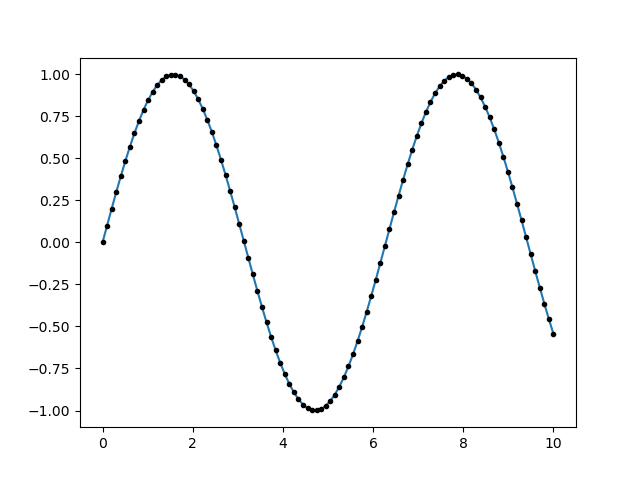

In [92]:
xdata, ydata = wrapper(xdata, ydata)

In [90]:
xdata

array([ 0.        ,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,         nan,         nan,
               nan,         nan,         nan,         nan,      

In [77]:
sel.ydata

array([ 0.        ,  0.10083842,  0.20064886,  0.2984138 ,  0.39313661,
        0.48385164,  0.56963411,  0.64960951,  0.72296256,  0.78894546,
        0.84688556,  0.8961922 ,  0.93636273,  0.96698762,  0.98775469,
        0.99845223,  0.99897117,  0.98930624,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
        0.57805259,  0.49282204,  0.40256749,  0.30820902,  0.21070855,
        0.11106004,  0.01027934, -0.09060615, -0.19056796, -0.28858706,
       -0.38366419, -0.47483011, -0.56115544, -0.64176014, -0.7158225 ,
       -0.7825875 , -0.84137452, -0.89158426, -0.93270486, -0.96431712,
       -0.98609877, -0.99782778, -0.99938456, -0.99075324, -0.97202182,
       -0.94338126, -0.90512352, -0.85763861, -0.80141062, -0.73701276,
       -0.66510151, -0.58640998, -0.50174037, -0.41195583, -0.31797166,
       -0.22074597, -0.12126992, -0.0205576 ,         nan,         nan,
               nan,         nan,         nan,         nan,      

AttributeError: 'hand_remove_points' object has no attribute 'onselect'

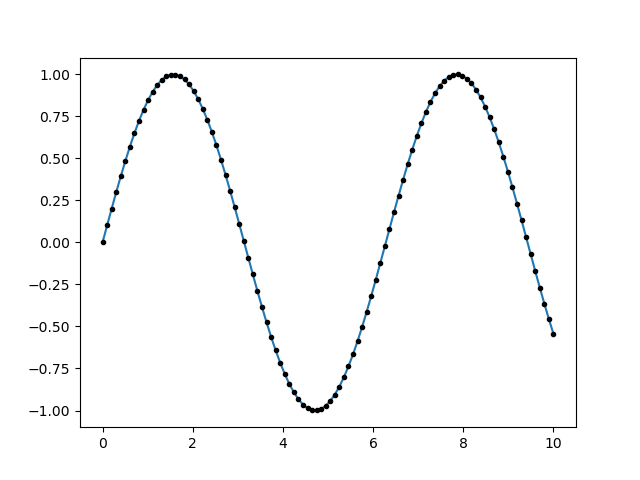